L'idea di questo notebook, creato il 21 marzo, è quella di capire se è più la lunghezza o le sources a definire l'appartenenza a un cluster o a un altro.

In [1]:
import json
import pandas as pd
import os
from tqdm.notebook import tqdm
import xml.etree.ElementTree as ET
import requests
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('FilePickles\EmbeddingLayer1and3_InfoGraphTRANSDUCTIVEhidden_dim32num_gc_layers3lr0.01_senza_AIFA.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb1and3 = pickle.load(file)
emb1 = emb1and3[0:86] # seleziono i primi 86 documenti, ovvero quelli relativi a layer 1
#siccome questi due file non contengono clinical entities!
emb3 = emb1and3[86:]

stringa_AIFA = '_senza_AIFA'

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3)  # embeddings è la tua matrice di embedding
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer3"

lista_testi3 = []
lista_source3 = []

for filename in os.listdir(cartella):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                # Estrai il testo dal campo "text" se presente
                if "text" in data and "source" in data:
                    testo = data["text"]
                    source = data["source"]
                    if source !='Agenzia Italiana del Farmaco':
                        lista_source3.append(source)
                        lista_testi3.append(testo)
                    
            except Exception as e:
                pass
import pandas as pd

colorvecLunghezza = []

for testo in lista_testi3:
    if len(testo) <1000: 
        colorvecLunghezza.append(0)#BLUE
    if len(testo)>1000:
        colorvecLunghezza.append(1) #RED

df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source3)))
df['Text'] = lista_testi3
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source3
df['ColorvecLunghezza'] = colorvecLunghezza
df['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
df['EmbeddingsTsneDim1'] = embeddings_tsne[:,1]

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [3]:
df

,Index,Text,Length,Source,ColorvecLunghezza,EmbeddingsTsneDim0,EmbeddingsTsneDim1
0,0,C.C. iniziava a fare dialisi all’età di 17 ann...,4372,GCND Giornale di Clinica Nefrologica e Dialisi,1,30.822714,57.652451
1,1,I.Z. è un giovane di 22 anni. Pochi giorni pri...,6579,GCND Giornale di Clinica Nefrologica e Dialisi,1,32.106537,57.378700
2,2,Nel giugno 2007 presso la Struttura Complessa ...,4478,GCND Giornale di Clinica Nefrologica e Dialisi,1,31.380047,57.387531
3,3,Donna di 75 anni affetta da diabete mellito di...,2745,GCND Giornale di Clinica Nefrologica e Dialisi,1,37.489555,38.905788
4,4,Nel settembre del 2008 giunge alla nostra osse...,5750,GCND Giornale di Clinica Nefrologica e Dialisi,1,33.237316,56.345196
...,...,...,...,...,...,...,...
2124,2124,Femmina - aa. 77 –\n\nAnamnesi patologica remo...,13387,Prof. Dr. Francescopaolo Mattioli,1,32.300713,54.908382
2125,2125,1° caso clinico\n\nFemmina - aa. 77\nAnamnesi ...,5799,Prof. Dr. Francescopaolo Mattioli,1,37.850964,-3.793020
2126,2126,Maschio- aa. 52\n\nAnamnesi patologica remota\...,4758,Prof. Dr. Francescopaolo Mattioli,1,7.440516,0.583831
2127,2127,"femmina, aa. 86\n\nAnamnesi patologica.\nprece...",4888,Prof. Dr. Francescopaolo Mattioli,1,4.437738,7.323576


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


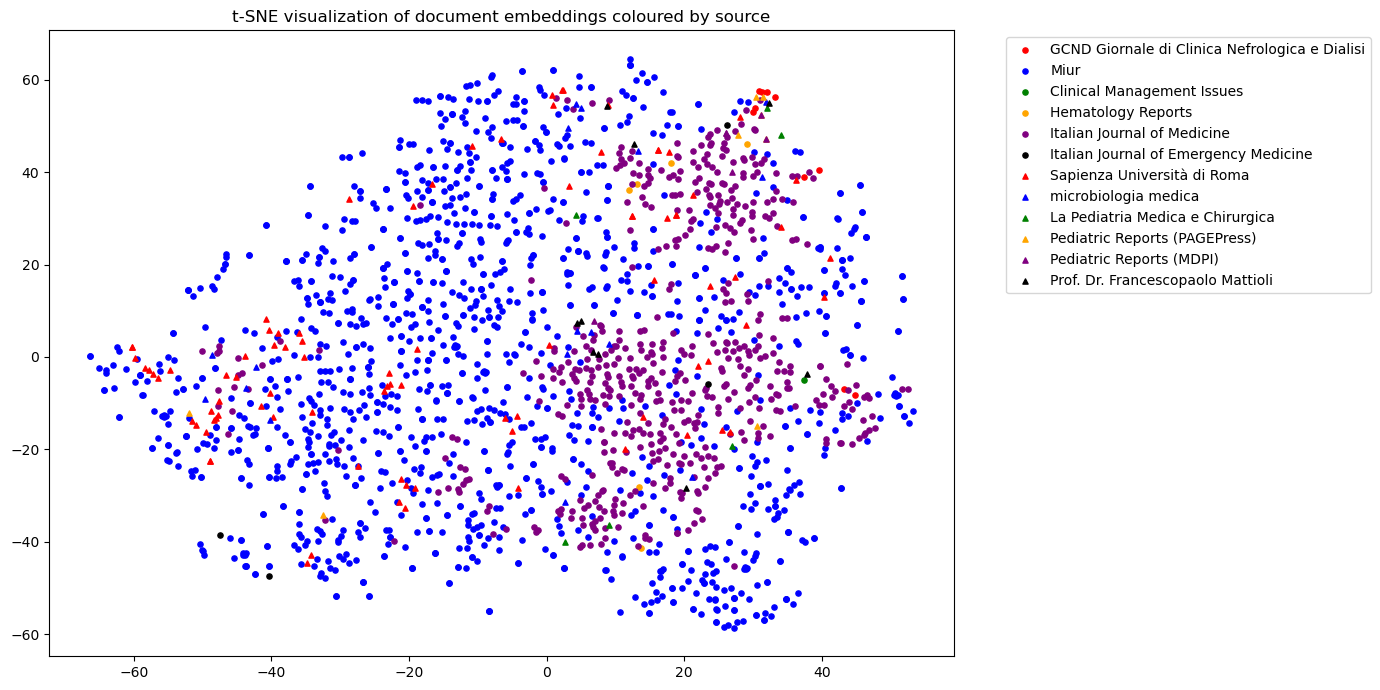

In [4]:
colori = ['red', 'blue', 'green', 'orange', 'purple','black']
stili = ['o', '^', 's', 'x', '*']

for i, source in enumerate(df['Source'].unique()):
    colore = colori[i%6]
    if i <6:
        stile = 'o'
    if i >=6:
        stile = '^'
    

    
    plt.scatter(df[df['Source'] == source]['EmbeddingsTsneDim0'], 
                df[df['Source'] == source]['EmbeddingsTsneDim1'], 
                s=14, label=source, c = colore ,marker =stile)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(14, 7)  # Imposta le dimensioni della figura
plt.title('t-SNE visualization of document embeddings coloured by source')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/sources_layer3.svg')
plt.savefig('immagini\sources_layer3.eps')
plt.show()

# Plot by lunghezze

In [38]:
with open('FilePickles\EmbeddingLayer1and3_InfoGraphTRANSDUCTIVEhidden_dim32num_gc_layers3lr0.01_senza_AIFA.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb1and3 = pickle.load(file)
emb1 = emb1and3[0:86] # seleziono i primi 86 documenti, ovvero quelli relativi a layer 1
#siccome questi due file non contengono clinical entities!
emb3 = emb1and3[86:]

stringa_AIFA = '_senza_AIFA'

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3)  # embeddings è la tua matrice di embedding
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer3"

lista_testi3 = []
lista_source3 = []

for filename in os.listdir(cartella):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                # Estrai il testo dal campo "text" se presente
                if "text" in data and "source" in data:
                    testo = data["text"]
                    source = data["source"]
                    if source !='Agenzia Italiana del Farmaco':
                        lista_source3.append(source)
                        lista_testi3.append(testo)
                    
            except Exception as e:
                pass


C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [39]:
import pandas as pd

colorvecLunghezza = []

for testo in lista_testi3:
    if len(testo) <800: 
        colorvecLunghezza.append(0)#BLUE
    if len(testo)>=800:
        colorvecLunghezza.append(1) #RED
        
colorvecSource = []
lista_source_short_layer3 = ['Miur','Sapienza Università di Roma']

lista_source_long_layer3 = [parola for parola in df.Source.unique() if parola not in lista_source_short_layer3]
for source in lista_source3:
    if source in lista_source_short_layer3:
        colorvecSource.append(0) #BLUE
    if source in lista_source_long_layer3:
        colorvecSource.append(1) #RED

df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source3)))
df['Text'] = lista_testi3
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source3
df['ColorvecSource'] = colorvecSource

df['ColorvecLunghezza'] = colorvecLunghezza
df['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
df['EmbeddingsTsneDim1'] = embeddings_tsne[:,1]

df['VecLunghezza'] = df['ColorvecLunghezza']
for i, val in enumerate(df['VecLunghezza']):
    if val == 0:
        df.loc[i, 'VecLunghezza'] = 'Short'
    elif val == 1:
        df.loc[i, 'VecLunghezza'] = 'Long'
        
df['VecSource'] = df['ColorvecSource']
for i, val in enumerate(df['VecSource']):
    if val == 0:
        df.loc[i, 'VecSource'] = 'Exams'
    elif val == 1:
        df.loc[i, 'VecSource'] = 'Journal Publications'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


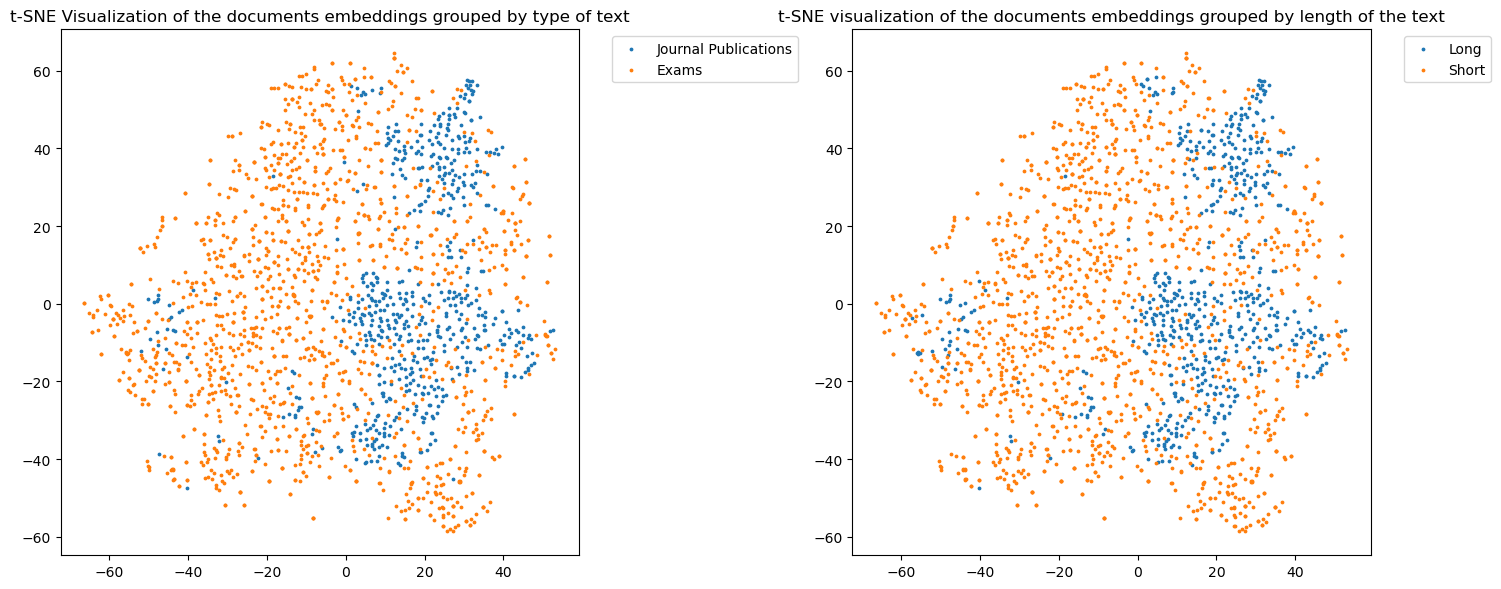

In [48]:
import matplotlib.pyplot as plt

# Imposta la dimensione della figura
plt.figure(figsize=(15, 6))

# Definisci il numero di righe e colonne dei subplot
num_rows = 1
num_cols = 2

# Primo subplot
plt.subplot(num_rows, num_cols, 1)
for lunghezza in df['VecSource'].unique():
    plt.scatter(df[df['VecSource']==lunghezza]['EmbeddingsTsneDim0'],
                df[df['VecSource']==lunghezza]['EmbeddingsTsneDim1'], s=3, label=lunghezza)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('t-SNE Visualization of the documents embeddings grouped by type of text')

# Secondo subplot
plt.subplot(num_rows, num_cols, 2)
for lunghezza in df['VecLunghezza'].unique():
    plt.scatter(df[df['VecLunghezza']==lunghezza]['EmbeddingsTsneDim0'],
                df[df['VecLunghezza']==lunghezza]['EmbeddingsTsneDim1'], s=3, label=lunghezza)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('t-SNE visualization of the documents embeddings grouped by length of the text')

# Mostra la figura
plt.tight_layout()

plt.savefig('immagini/comparison_lengthANDtype_layer3.svg')
plt.savefig('immagini\comparison_lengthANDtype_layer3.eps')
plt.show()

# Facciamo ora un modello di clustering
le cui labels serviranno come target variable per capire quali informazioni sono più importanti per l'appartenenza dei clusters.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


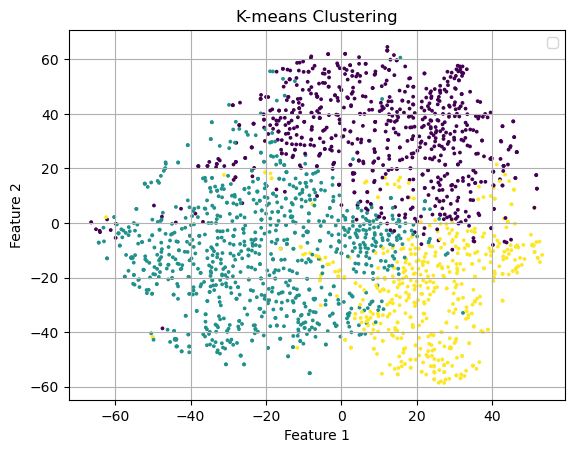

In [9]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(emb3)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(df['EmbeddingsTsneDim0'], df['EmbeddingsTsneDim1'], c=labels, cmap='viridis', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
labels

array([0, 0, 0, ..., 1, 1, 0])

In [11]:
df['labels_clustering'] = labels

In [12]:
df

,Index,Text,Length,Source,ColorvecSource,ColorvecLunghezza,EmbeddingsTsneDim0,EmbeddingsTsneDim1,VecLunghezza,labels_clustering
0,0,C.C. iniziava a fare dialisi all’età di 17 ann...,4372,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,30.822714,57.652451,Lungo,0
1,1,I.Z. è un giovane di 22 anni. Pochi giorni pri...,6579,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,32.106537,57.378700,Lungo,0
2,2,Nel giugno 2007 presso la Struttura Complessa ...,4478,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,31.380047,57.387531,Lungo,0
3,3,Donna di 75 anni affetta da diabete mellito di...,2745,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,37.489555,38.905788,Lungo,0
4,4,Nel settembre del 2008 giunge alla nostra osse...,5750,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,33.237316,56.345196,Lungo,0
...,...,...,...,...,...,...,...,...,...,...
2124,2124,Femmina - aa. 77 –\n\nAnamnesi patologica remo...,13387,Prof. Dr. Francescopaolo Mattioli,1,1,32.300713,54.908382,Lungo,0
2125,2125,1° caso clinico\n\nFemmina - aa. 77\nAnamnesi ...,5799,Prof. Dr. Francescopaolo Mattioli,1,1,37.850964,-3.793020,Lungo,2
2126,2126,Maschio- aa. 52\n\nAnamnesi patologica remota\...,4758,Prof. Dr. Francescopaolo Mattioli,1,1,7.440516,0.583831,Lungo,1
2127,2127,"femmina, aa. 86\n\nAnamnesi patologica.\nprece...",4888,Prof. Dr. Francescopaolo Mattioli,1,1,4.437738,7.323576,Lungo,1


In [13]:
X = df.loc[:,['Length','Source','VecLunghezza','ColorvecSource']]

In [14]:
#X = df.loc[:,['Source']]

In [15]:
X

,Length,Source,VecLunghezza,ColorvecSource
0,4372,GCND Giornale di Clinica Nefrologica e Dialisi,Lungo,1
1,6579,GCND Giornale di Clinica Nefrologica e Dialisi,Lungo,1
2,4478,GCND Giornale di Clinica Nefrologica e Dialisi,Lungo,1
3,2745,GCND Giornale di Clinica Nefrologica e Dialisi,Lungo,1
4,5750,GCND Giornale di Clinica Nefrologica e Dialisi,Lungo,1
...,...,...,...,...
2124,13387,Prof. Dr. Francescopaolo Mattioli,Lungo,1
2125,5799,Prof. Dr. Francescopaolo Mattioli,Lungo,1
2126,4758,Prof. Dr. Francescopaolo Mattioli,Lungo,1
2127,4888,Prof. Dr. Francescopaolo Mattioli,Lungo,1


In [16]:
X_dummy = pd.get_dummies(X)

In [17]:
X['Source'].unique()

array(['GCND Giornale di Clinica Nefrologica e Dialisi', 'Miur',
       'Clinical Management Issues', 'Hematology Reports',
       'Italian Journal of Medicine',
       'Italian Journal of Emergency Medicine',
       'Sapienza Università di Roma', 'microbiologia medica',
       'La Pediatria Medica e Chirurgica',
       'Pediatric Reports (PAGEPress)', 'Pediatric Reports (MDPI)',
       'Prof. Dr. Francescopaolo Mattioli'], dtype=object)

In [18]:
X_dummy = X_dummy.drop('Length', axis = 1)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supponiamo che X sia il tuo DataFrame con le feature e y sia la colonna dei target
# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_dummy, df['labels_clustering'], test_size=0.2, random_state=42)

# Crea un modello Decision Tree Classifier
modello_decision_tree = DecisionTreeClassifier()

# Addestra il modello sul set di addestramento
modello_decision_tree.fit(X_train, y_train)

# Fai predizioni sul set di test
predizioni = modello_decision_tree.predict(X_test)

# Valuta le prestazioni del modello
accuratezza = accuracy_score(y_test, predizioni)
print("Accuratezza del modello Decision Tree:", accuratezza)

Accuratezza del modello Decision Tree: 0.4413145539906103


In [20]:
importanza_variabili = modello_decision_tree.feature_importances_

# Crea un DataFrame per visualizzare l'importanza delle variabili
import pandas as pd
importanza_df = pd.DataFrame({'Feature': X_dummy.columns, 'Importanza': importanza_variabili})
importanza_df = importanza_df.sort_values(by='Importanza', ascending=False)

# Stampare le variabili più importanti
print(importanza_df)

                                              Feature  Importanza
0                                      ColorvecSource    0.582278
13                                 VecLunghezza_Corto    0.135314
2   Source_GCND Giornale di Clinica Nefrologica e ...    0.065179
12                        Source_microbiologia medica    0.050641
8                     Source_Pediatric Reports (MDPI)    0.041430
11                 Source_Sapienza Università di Roma    0.027885
1                   Source_Clinical Management Issues    0.023762
4        Source_Italian Journal of Emergency Medicine    0.023231
6             Source_La Pediatria Medica e Chirurgica    0.019403
5                  Source_Italian Journal of Medicine    0.019387
3                           Source_Hematology Reports    0.007057
10           Source_Prof. Dr. Francescopaolo Mattioli    0.004432
7                                         Source_Miur    0.000000
9                Source_Pediatric Reports (PAGEPress)    0.000000
14        

In [21]:
X_dummy.corr()

,ColorvecSource,Source_Clinical Management Issues,Source_GCND Giornale di Clinica Nefrologica e Dialisi,Source_Hematology Reports,Source_Italian Journal of Emergency Medicine,Source_Italian Journal of Medicine,Source_La Pediatria Medica e Chirurgica,Source_Miur,Source_Pediatric Reports (MDPI),Source_Pediatric Reports (PAGEPress),Source_Prof. Dr. Francescopaolo Mattioli,Source_Sapienza Università di Roma,Source_microbiologia medica,VecLunghezza_Corto,VecLunghezza_Lungo
ColorvecSource,1.000000,0.034565,0.109537,0.084767,0.069179,0.922603,0.084767,-0.905694,0.084767,0.097926,0.103891,-0.130995,0.143055,-0.630146,0.630146
Source_Clinical Management Issues,0.034565,1.000000,-0.001489,-0.001152,-0.000941,-0.012543,-0.001152,-0.031305,-0.001152,-0.001331,-0.001412,-0.004528,-0.001945,-0.054589,0.054589
Source_GCND Giornale di Clinica Nefrologica e Dialisi,0.109537,-0.001489,1.000000,-0.003652,-0.002980,-0.039749,-0.003652,-0.099207,-0.003652,-0.004219,-0.004476,-0.014349,-0.006163,-0.172992,0.172992
Source_Hematology Reports,0.084767,-0.001152,-0.003652,1.000000,-0.002306,-0.030760,-0.002826,-0.076773,-0.002826,-0.003265,-0.003464,-0.011104,-0.004770,-0.056381,0.056381
Source_Italian Journal of Emergency Medicine,0.069179,-0.000941,-0.002980,-0.002306,1.000000,-0.025104,-0.002306,-0.062655,-0.002306,-0.002665,-0.002827,-0.009062,-0.003892,-0.077634,0.077634
Source_Italian Journal of Medicine,0.922603,-0.012543,-0.039749,-0.030760,-0.025104,1.000000,-0.030760,-0.835596,-0.030760,-0.035536,-0.037700,-0.120857,-0.051912,-0.515726,0.515726
Source_La Pediatria Medica e Chirurgica,0.084767,-0.001152,-0.003652,-0.002826,-0.002306,-0.030760,1.000000,-0.076773,-0.002826,-0.003265,-0.003464,-0.011104,-0.004770,-0.082212,0.082212
Source_Miur,-0.905694,-0.031305,-0.099207,-0.076773,-0.062655,-0.835596,-0.076773,1.000000,-0.076773,-0.088691,-0.094093,-0.301638,-0.129564,0.573474,-0.573474
Source_Pediatric Reports (MDPI),0.084767,-0.001152,-0.003652,-0.002826,-0.002306,-0.030760,-0.002826,-0.076773,1.000000,-0.003265,-0.003464,-0.011104,-0.004770,-0.133873,0.133873
Source_Pediatric Reports (PAGEPress),0.097926,-0.001331,-0.004219,-0.003265,-0.002665,-0.035536,-0.003265,-0.088691,-0.003265,1.000000,-0.004002,-0.012828,-0.005510,-0.154656,0.154656


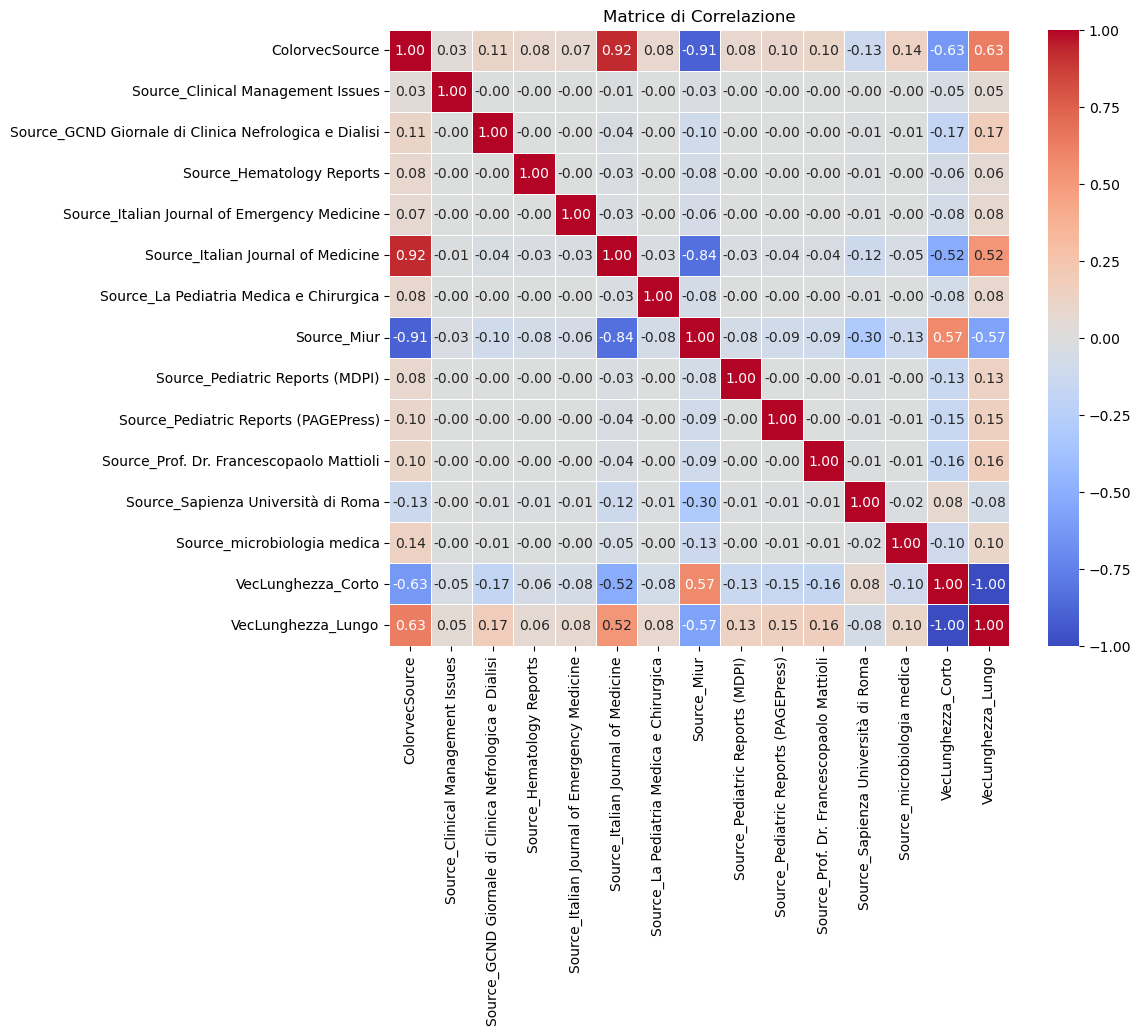

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
matrice_correlazione = X_dummy.corr()

# Visualizza la matrice di correlazione come una heatmap utilizzando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlazione, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

In [23]:
X_dummy

,ColorvecSource,Source_Clinical Management Issues,Source_GCND Giornale di Clinica Nefrologica e Dialisi,Source_Hematology Reports,Source_Italian Journal of Emergency Medicine,Source_Italian Journal of Medicine,Source_La Pediatria Medica e Chirurgica,Source_Miur,Source_Pediatric Reports (MDPI),Source_Pediatric Reports (PAGEPress),Source_Prof. Dr. Francescopaolo Mattioli,Source_Sapienza Università di Roma,Source_microbiologia medica,VecLunghezza_Corto,VecLunghezza_Lungo
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2125,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2126,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2127,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [24]:
X_dummy[X_dummy['Source_Sapienza Università di Roma']==1]

X_dummy[X_dummy['Source_Miur']==1]

X_dummy[X_dummy['Source_Prof. Dr. Francescopaolo Mattioli']==1]

,ColorvecSource,Source_Clinical Management Issues,Source_GCND Giornale di Clinica Nefrologica e Dialisi,Source_Hematology Reports,Source_Italian Journal of Emergency Medicine,Source_Italian Journal of Medicine,Source_La Pediatria Medica e Chirurgica,Source_Miur,Source_Pediatric Reports (MDPI),Source_Pediatric Reports (PAGEPress),Source_Prof. Dr. Francescopaolo Mattioli,Source_Sapienza Università di Roma,Source_microbiologia medica,VecLunghezza_Corto,VecLunghezza_Lungo
2120,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2121,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2122,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2123,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2124,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2125,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2126,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2127,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2128,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# Facciamo stessa anlisi di clustering e label predicitons basandoci ora su MiurSap e Other in maniera distinta!!

In [25]:
X = df.loc[:,['Length','Source','VecLunghezza','ColorvecSource']]

In [26]:
X = df.loc[:,['Length','ColorvecSource']]

In [28]:
XMiurSap =X[X['ColorvecSource']==0]
XOther = X[X['ColorvecSource']==1]

emb3Other = emb3[XOther.index]
emb3MiurSap = emb3[XMiurSap.index]

***
Other:
***

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


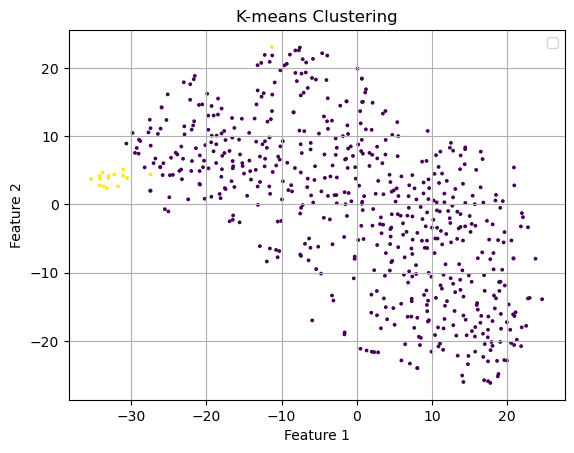

In [29]:
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3Other) 

kmeans = KMeans(n_clusters=2, random_state=2)
kmeans.fit(emb3Other)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], c=labels, cmap='viridis', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
X_dummy = pd.get_dummies(XOther)
X_dummy = X_dummy.drop('Length', axis = 1)
#X['Source'].unique()

In [31]:
X_dummy

,ColorvecSource
0,1
1,1
2,1
3,1
4,1
...,...
2124,1
2125,1
2126,1
2127,1


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supponiamo che X sia il tuo DataFrame con le feature e y sia la colonna dei target
# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_dummy, labels, test_size=0.2, random_state=42)

# Crea un modello Decision Tree Classifier
modello_decision_tree = DecisionTreeClassifier()

# Addestra il modello sul set di addestramento
modello_decision_tree.fit(X_train, y_train)

# Fai predizioni sul set di test
predizioni = modello_decision_tree.predict(X_test)

# Valuta le prestazioni del modello
accuratezza = accuracy_score(y_test, predizioni)
print("Accuratezza del modello Decision Tree:", accuratezza)

Accuratezza del modello Decision Tree: 0.9752066115702479


In [33]:
importanza_variabili = modello_decision_tree.feature_importances_

# Crea un DataFrame per visualizzare l'importanza delle variabili
import pandas as pd
importanza_df = pd.DataFrame({'Feature': X_dummy.columns, 'Importanza': importanza_variabili})
importanza_df = importanza_df.sort_values(by='Importanza', ascending=False)

# Stampare le variabili più importanti
print(importanza_df)

          Feature  Importanza
0  ColorvecSource         0.0


C:\Users\enduser\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\enduser\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


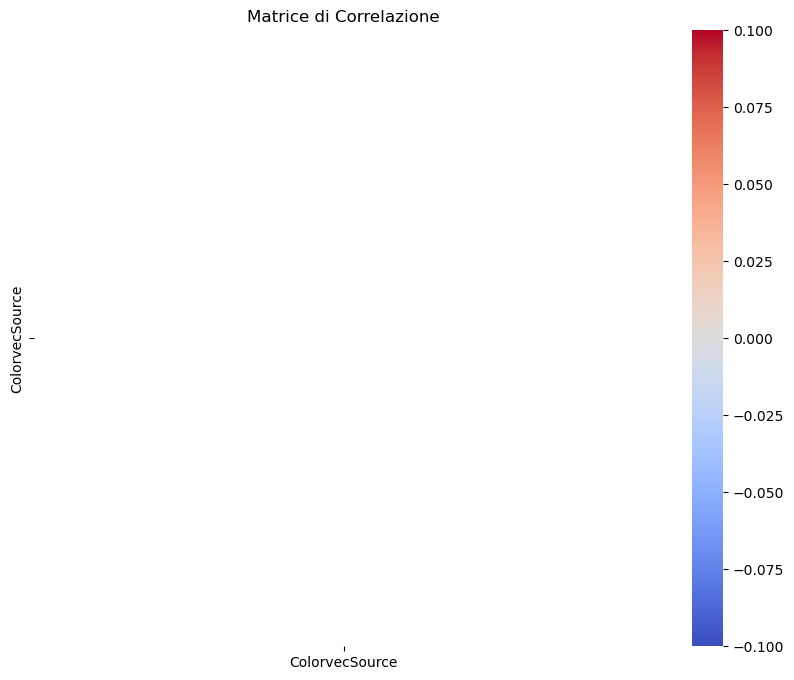

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
matrice_correlazione = X_dummy.corr()

# Visualizza la matrice di correlazione come una heatmap utilizzando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlazione, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

***
MiurSap:
***

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


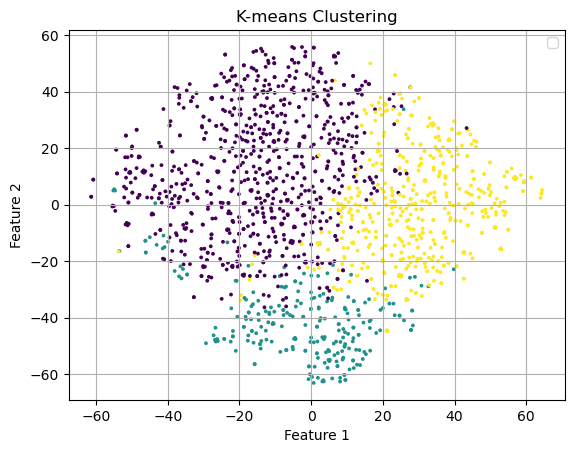

In [35]:
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3MiurSap) 

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(emb3MiurSap)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], c=labels, cmap='viridis', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
X_dummy = pd.get_dummies(XMiurSap)
#X_dummy = X_dummy.drop('Length', axis = 1)
X['Source'].unique()

KeyError: 'Source'

In [ ]:
X_dummy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supponiamo che X sia il tuo DataFrame con le feature e y sia la colonna dei target
# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_dummy, labels, test_size=0.2, random_state=42)

# Crea un modello Decision Tree Classifier
modello_decision_tree = DecisionTreeClassifier()

# Addestra il modello sul set di addestramento
modello_decision_tree.fit(X_train, y_train)

# Fai predizioni sul set di test
predizioni = modello_decision_tree.predict(X_test)

# Valuta le prestazioni del modello
accuratezza = accuracy_score(y_test, predizioni)
print("Accuratezza del modello Decision Tree:", accuratezza)

In [ ]:
importanza_variabili = modello_decision_tree.feature_importances_

# Crea un DataFrame per visualizzare l'importanza delle variabili
import pandas as pd
importanza_df = pd.DataFrame({'Feature': X_dummy.columns, 'Importanza': importanza_variabili})
importanza_df = importanza_df.sort_values(by='Importanza', ascending=False)

# Stampare le variabili più importanti
print(importanza_df)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
matrice_correlazione = X_dummy.corr()

# Visualizza la matrice di correlazione come una heatmap utilizzando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlazione, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

# VEDIAMO PER UN ULITMA VOLTA SE USANDO GLOBAL MEAN POOL AL POSTO DI SUM POOL SI OTTENGONO DEGLI EMBEDDINGS MENO DIPENDENTI DALLA LUNGHEZZA

In [ ]:
import json
import pandas as pd
import os
from tqdm.notebook import tqdm
import xml.etree.ElementTree as ET
import requests
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt

In [ ]:
with open('FilePickles\EmbeddingLayer1and3_InfoGraphTRANSDUCTIVEhidden_dim32num_gc_layers3lr0.01_senza_AIFAMeanPool.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb1and3 = pickle.load(file)
emb1 = emb1and3[0:86] # seleziono i primi 86 documenti, ovvero quelli relativi a layer 1
#siccome questi due file non contengono clinical entities!
emb3 = emb1and3[86:]

stringa_AIFA = '_senza_AIFA'

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3)  # embeddings è la tua matrice di embedding
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer3"

lista_testi3 = []
lista_source3 = []

for filename in os.listdir(cartella):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                # Estrai il testo dal campo "text" se presente
                if "text" in data and "source" in data:
                    testo = data["text"]
                    source = data["source"]
                    if source !='Agenzia Italiana del Farmaco':
                        lista_source3.append(source)
                        lista_testi3.append(testo)
                    
            except Exception as e:
                pass
import pandas as pd

colorvecLunghezza = []

for testo in lista_testi3:
    if len(testo) <1000: 
        colorvecLunghezza.append(0)#BLUE
    if len(testo)>1000:
        colorvecLunghezza.append(1) #RED

df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source3)))
df['Text'] = lista_testi3
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source3
df['ColorvecLunghezza'] = colorvecLunghezza
df['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
df['EmbeddingsTsneDim1'] = embeddings_tsne[:,1]

In [ ]:
df

In [ ]:
colori = ['red', 'blue', 'green', 'orange', 'purple','black']
stili = ['o', '^', 's', 'x', '*']

for i, source in enumerate(df['Source'].unique()):
    colore = colori[i%6]
    if i <6:
        stile = 'o'
    if i >=6:
        stile = '^'
    

    
    plt.scatter(df[df['Source'] == source]['EmbeddingsTsneDim0'], 
                df[df['Source'] == source]['EmbeddingsTsneDim1'], 
                s=14, label=source, c = colore ,marker =stile)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(14, 7)  # Imposta le dimensioni della figura
plt.title('t-SNE visualization of document embeddings coloured by source')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/sources_layer3.svg')
plt.savefig('immagini\sources_layer3.eps')
plt.show()

# Plot by lunghezze

In [ ]:
import pandas as pd

colorvecLunghezza = []

for testo in lista_testi3:
    if len(testo) <1200: 
        colorvecLunghezza.append(0)#BLUE
    if len(testo)>=1200:
        colorvecLunghezza.append(1) #RED
        
colorvecSource = []
lista_source_short_layer3 = ['Miur','Sapienza Università di Roma']

lista_source_long_layer3 = [parola for parola in df.Source.unique() if parola not in lista_source_short_layer3]
for source in lista_source3:
    if source in lista_source_short_layer3:
        colorvecSource.append(0) #BLUE
    if source in lista_source_long_layer3:
        colorvecSource.append(1) #RED

df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source3)))
df['Text'] = lista_testi3
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source3
df['ColorvecSource'] = colorvecSource

df['ColorvecLunghezza'] = colorvecLunghezza
df['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
df['EmbeddingsTsneDim1'] = embeddings_tsne[:,1]

df['VecLunghezza'] = df['ColorvecLunghezza']
for i, val in enumerate(df['VecLunghezza']):
    if val == 0:
        df.loc[i, 'VecLunghezza'] = 'Corto'
    elif val == 1:
        df.loc[i, 'VecLunghezza'] = 'Lungo'

In [ ]:
for lunghezza in df['ColorvecSource'].unique():
    plt.scatter(df[df['ColorvecSource']==lunghezza]['EmbeddingsTsneDim0'],
                df[df['ColorvecSource']==lunghezza]['EmbeddingsTsneDim1'], s = 3, label = lunghezza)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
for lunghezza in df['VecLunghezza'].unique():
    plt.scatter(df[df['VecLunghezza']==lunghezza]['EmbeddingsTsneDim0'],
                df[df['VecLunghezza']==lunghezza]['EmbeddingsTsneDim1'], s = 3, label = lunghezza)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Facciamo ora un modello di clustering
le cui labels serviranno come target variable per capire quali informazioni sono più importanti per l'appartenenza dei clusters.

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=2)
kmeans.fit(emb3)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(df['EmbeddingsTsneDim0'], df['EmbeddingsTsneDim1'], c=labels, cmap='viridis', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
labels

In [ ]:
df['labels_clustering'] = labels

In [ ]:
df

In [ ]:
X = df.loc[:,['Length','Source','VecLunghezza','ColorvecSource']]

In [ ]:
#X = df.loc[:,['Source']]

In [ ]:
X

In [ ]:
X_dummy = pd.get_dummies(X)

In [ ]:
X['Source'].unique()

In [ ]:
#X_dummy = X_dummy.drop('Length', axis = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supponiamo che X sia il tuo DataFrame con le feature e y sia la colonna dei target
# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_dummy, df['labels_clustering'], test_size=0.2, random_state=42)

# Crea un modello Decision Tree Classifier
modello_decision_tree = DecisionTreeClassifier()

# Addestra il modello sul set di addestramento
modello_decision_tree.fit(X_train, y_train)

# Fai predizioni sul set di test
predizioni = modello_decision_tree.predict(X_test)

# Valuta le prestazioni del modello
accuratezza = accuracy_score(y_test, predizioni)
print("Accuratezza del modello Decision Tree:", accuratezza)

In [ ]:
importanza_variabili = modello_decision_tree.feature_importances_

# Crea un DataFrame per visualizzare l'importanza delle variabili
import pandas as pd
importanza_df = pd.DataFrame({'Feature': X_dummy.columns, 'Importanza': importanza_variabili})
importanza_df = importanza_df.sort_values(by='Importanza', ascending=False)

# Stampare le variabili più importanti
print(importanza_df)

In [ ]:
X_dummy.corr()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
matrice_correlazione = X_dummy.corr()

# Visualizza la matrice di correlazione come una heatmap utilizzando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlazione, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

In [ ]:
X_dummy

In [ ]:
X_dummy[X_dummy['Source_Sapienza Università di Roma']==1]

X_dummy[X_dummy['Source_Miur']==1]

X_dummy[X_dummy['Source_Prof. Dr. Francescopaolo Mattioli']==1]

# Facciamo stessa anlisi di clustering e label predicitons basandoci ora su MiurSap e Other in maniera distinta!!

In [ ]:
X = df.loc[:,['Length','Source','VecLunghezza','ColorvecSource']]

In [ ]:
#X = df.loc[:,['Length','ColorvecSource']]

In [ ]:
XOther.index

In [ ]:
XMiurSap =X[X['ColorvecSource']==0]
XOther = X[X['ColorvecSource']==1]

emb3Other = emb3[XOther.index]
emb3MiurSap = emb3[XMiurSap.index]

***
Other:
***

In [ ]:
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3Other) 

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans.fit(emb3Other)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], c=labels, cmap='viridis', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
XOther

In [ ]:
X_dummy = pd.get_dummies(XOther)
#X_dummy = X_dummy.drop('Length', axis = 1)
#X['Source'].unique()

In [ ]:
X_dummy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supponiamo che X sia il tuo DataFrame con le feature e y sia la colonna dei target
# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_dummy, labels, test_size=0.2, random_state=42)

# Crea un modello Decision Tree Classifier
modello_decision_tree = DecisionTreeClassifier()

# Addestra il modello sul set di addestramento
modello_decision_tree.fit(X_train, y_train)

# Fai predizioni sul set di test
predizioni = modello_decision_tree.predict(X_test)

# Valuta le prestazioni del modello
accuratezza = accuracy_score(y_test, predizioni)
print("Accuratezza del modello Decision Tree:", accuratezza)

In [ ]:
importanza_variabili = modello_decision_tree.feature_importances_

# Crea un DataFrame per visualizzare l'importanza delle variabili
import pandas as pd
importanza_df = pd.DataFrame({'Feature': X_dummy.columns, 'Importanza': importanza_variabili})
importanza_df = importanza_df.sort_values(by='Importanza', ascending=False)

# Stampare le variabili più importanti
print(importanza_df)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
matrice_correlazione = X_dummy.corr()

# Visualizza la matrice di correlazione come una heatmap utilizzando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlazione, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

***
MiurSap:
***

In [ ]:
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3MiurSap) 

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans.fit(emb3MiurSap)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], c=labels, cmap='viridis', s=3)
# Plot cluster centroids

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_dummy = pd.get_dummies(XMiurSap)
#X_dummy = X_dummy.drop('Length', axis = 1)
X['Source'].unique()

In [ ]:
X_dummy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supponiamo che X sia il tuo DataFrame con le feature e y sia la colonna dei target
# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_dummy, labels, test_size=0.2, random_state=42)

# Crea un modello Decision Tree Classifier
modello_decision_tree = DecisionTreeClassifier()

# Addestra il modello sul set di addestramento
modello_decision_tree.fit(X_train, y_train)

# Fai predizioni sul set di test
predizioni = modello_decision_tree.predict(X_test)

# Valuta le prestazioni del modello
accuratezza = accuracy_score(y_test, predizioni)
print("Accuratezza del modello Decision Tree:", accuratezza)

In [ ]:
importanza_variabili = modello_decision_tree.feature_importances_

# Crea un DataFrame per visualizzare l'importanza delle variabili
import pandas as pd
importanza_df = pd.DataFrame({'Feature': X_dummy.columns, 'Importanza': importanza_variabili})
importanza_df = importanza_df.sort_values(by='Importanza', ascending=False)

# Stampare le variabili più importanti
print(importanza_df)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
matrice_correlazione = X_dummy.corr()

# Visualizza la matrice di correlazione come una heatmap utilizzando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlazione, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()